# Implementing word embeding from scratch

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
%cd /content/drive/My Drive/NLP/

/content/drive/My Drive/NLP


In [9]:
with open('alice.txt', 'r') as f:
    filedata = f.readlines()

In [12]:
print(filedata)

['\n', '\n', 'CHAPTER I. Down the Rabbit-Hole\n', '\n', 'Alice was beginning to get very tired of sitting by her sister on the\n', 'bank, and of having nothing to do: once or twice she had peeped into the\n', 'book her sister was reading, but it had no pictures or conversations in\n', "it, 'and what is the use of a book,' thought Alice 'without pictures or\n", "conversations?'\n", '\n', 'So she was considering in her own mind (as well as she could, for the\n', 'hot day made her feel very sleepy and stupid), whether the pleasure\n', 'of making a daisy-chain would be worth the trouble of getting up and\n', 'picking the daisies, when suddenly a White Rabbit with pink eyes ran\n', 'close by her.\n', '\n', 'There was nothing so VERY remarkable in that; nor did Alice think it so\n', "VERY much out of the way to hear the Rabbit say to itself, 'Oh dear!\n", "Oh dear! I shall be late!' (when she thought it over afterwards, it\n", 'occurred to her that she ought to have wondered at this, but at 

# Importing libraries

In [43]:
import numpy as np
import keras.backend as K
import tensorflow as tf
import operator
from tensorflow import keras

from tensorflow.keras.preprocessing.sequence import skipgrams
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Reshape, Lambda
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing import sequence
from sklearn.metrics.pairwise import cosine_distances

from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors as nn
from matplotlib import pylab
import pandas as pd

**Data pre-processing**

In [37]:
with open("alice.txt", "r") as f:
    filedata = f.readlines()

In [39]:
filedata = [sentence for sentence in filedata if sentence.count(" ") >= 2]

# Remove punctuation in text and fit tokenizer on entire corpus
tokenizer = Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~\t\n'+"'")

The tokenizer will filter the punctuation and other irrelevent data and will assign each word in the text to unique integer

In [40]:
tokenizer.fit_on_texts(filedata)
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
vocab_unique=len(word_index)+1
sequences = tokenizer.texts_to_sequences(filedata)

print("Tokenized sequences:", sequences)
print("Word index:", word_index)

Tokenized sequences: [[305, 7, 38, 1, 92, 595], [11, 13, 253, 3, 106, 30, 470, 8, 342, 76, 16, 379, 20, 1], [828, 2, 8, 343, 136, 3, 54, 134, 57, 596, 6, 23, 829, 65, 1], [323, 16, 379, 13, 830, 24, 5, 23, 45, 683, 57, 1447, 12], [5, 2, 31, 36, 1, 212, 8, 4, 323, 59, 11, 170, 683, 57], [27, 6, 13, 831, 12, 16, 344, 324, 15, 70, 15, 6, 58, 25, 1], [471, 160, 154, 16, 415, 30, 597, 2, 529, 325, 1, 1049], [8, 416, 4, 1448, 1449, 49, 28, 684, 1, 530, 8, 188, 39, 2], [1050, 1, 1450, 56, 279, 4, 148, 92, 22, 1451, 155, 228], [280, 76, 16], [40, 13, 136, 27, 30, 1051, 12, 14, 832, 67, 11, 89, 5, 27], [30, 93, 35, 8, 1, 83, 3, 254, 1, 92, 96, 3, 255, 108, 156], [108, 156, 7, 173, 28, 531, 56, 6, 59, 5, 124, 1052, 5], [1053, 3, 16, 14, 6, 256, 3, 55, 1452, 18, 32, 24, 18, 1, 62], [5, 21, 164, 86, 685, 24, 56, 1, 92, 1453, 180, 4, 417], [35, 8, 78, 1054, 472, 2, 109, 18, 5, 2, 43, 345, 20], [11, 1055, 3, 16, 204, 25, 5, 1454, 598, 16, 324, 14, 6, 23], [103, 128, 238, 4, 92, 22, 346, 4, 1054, 472

In [52]:
skipgramsoftxt=[skipgrams(sequence, vocab_size, window_size=2)for sequence in sequences]

In [54]:
skipgramsoftxt

[([[38, 7],
   [595, 586],
   [595, 1],
   [7, 736],
   [595, 92],
   [92, 1],
   [1, 7],
   [7, 1],
   [92, 595],
   [7, 38],
   [7, 2238],
   [1, 922],
   [38, 2365],
   [305, 7],
   [38, 1],
   [1, 595],
   [38, 92],
   [38, 305],
   [1, 92],
   [7, 553],
   [38, 82],
   [1, 1049],
   [92, 324],
   [92, 38],
   [305, 38],
   [1, 906],
   [1, 700],
   [1, 38],
   [92, 2253],
   [38, 1651],
   [92, 248],
   [305, 1706],
   [305, 605],
   [38, 125],
   [595, 2221],
   [7, 305]],
  [1,
   0,
   1,
   0,
   1,
   1,
   1,
   1,
   1,
   1,
   0,
   0,
   0,
   1,
   1,
   1,
   1,
   1,
   1,
   0,
   0,
   0,
   0,
   1,
   1,
   0,
   0,
   1,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   1]),
 ([[20, 16],
   [342, 2510],
   [253, 1995],
   [13, 3],
   [76, 910],
   [106, 2387],
   [106, 594],
   [13, 11],
   [30, 106],
   [379, 552],
   [470, 106],
   [8, 1748],
   [30, 348],
   [3, 106],
   [379, 387],
   [379, 778],
   [342, 8],
   [20, 1803],
   [470, 1271],
   [253, 3],
   [253, 10

The skipgrams produces pairs and labels.

Pair: These are pair derived from the sequences given to it and fixed window size

Labels: This tells wether the pair is from context window or not because we pick words from context window and also randomly from dictionary and label them as zero meaning negative sampling

In [64]:
pairs = []

for sublist in skipgramsoftxt:
    pairs_list = sublist[0]

    for pair in pairs_list:
        pairs.append(pair)

labels = []

for sublist in skipgramsoftxt:
    labels_list = sublist[1]

    for label in labels_list:
        labels.append(label)

# View some sample pairs and labels
print("Sample pairs:", pairs[:5])
print("Sample labels:", labels[:5])

Sample pairs: [[38, 7], [595, 586], [595, 1], [7, 736], [595, 92]]
Sample labels: [1, 0, 1, 0, 1]


In neural networks for natural language processing (NLP), an embedding layer is typically used as the first layer to convert input text (represented as integers or categorical values) into dense vectors of fixed size, called embeddings.

In [65]:
#dimension of embeding
embedding_dim = 50

#model
model=Sequential()
model.add(Embedding(input_dim=len(word_index) + 1,output_dim=embedding_dim, input_length=1))

The Reshape layer in Keras is used to reshape the tensor output from the previous layer into a desired shape.

The Dense layer in Keras is a fully connected neural network layer where every input neuron is connected to every output neuron.

activation='softmax' specifies the activation function for the output layer. In Word2Vec implementations, softmax activation is used to compute probabilities of each word in the vocabulary being the center word (for skip-gram model) or context word (for CBOW model) given the input word.



In [ ]:
model.add(Reshape((embedding_dim,)))
model.add(Dense(vocab_size, activation='softmax'))

In [66]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy')

# View the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1, 50)             127850    
                                                                 
Total params: 127850 (499.41 KB)
Trainable params: 127850 (499.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [68]:
skipgram_models=[]
skipgram_models.append(model)

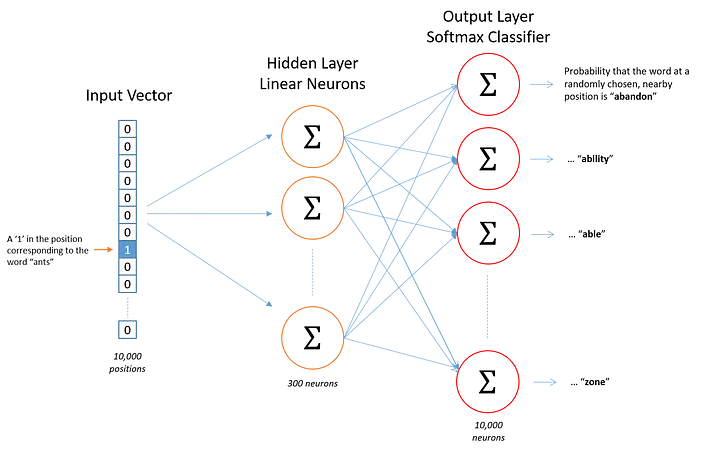

In [70]:
target_words = np.array([pair[0] for pair in pairs])
context_words = np.array([pair[1] for pair in pairs])
labels = np.array(labels)

# Print sample data
print("Target words shape:", target_words[:3])
print("Context words shape:", context_words[:3])
print("Labels shape:", labels[:3])

Target words shape: [ 38 595 595]
Context words shape: [  7 586   1]
Labels shape: [1 0 1]


The batch_size parameter in machine learning, particularly in training neural networks, determines how many examples (data points) are processed together in one iteration (one forward and backward pass) of the model during training.

In [71]:
epochs = 100
batch_size = 128

history = model.fit(x=target_words, y=labels, epochs=epochs, batch_size=batch_size, verbose=1)

Epoch 1/100
1478/1478 [==============================] - 6s 3ms/step - loss: 3.9954
Epoch 2/100
1478/1478 [==============================] - 4s 3ms/step - loss: 3.3474
Epoch 3/100
1478/1478 [==============================] - 4s 2ms/step - loss: 3.3327
Epoch 4/100
1478/1478 [==============================] - 4s 2ms/step - loss: 3.3310
Epoch 5/100
1478/1478 [==============================] - 6s 4ms/step - loss: 3.3307
Epoch 6/100
1478/1478 [==============================] - 4s 2ms/step - loss: 3.3316
Epoch 7/100
1478/1478 [==============================] - 4s 2ms/step - loss: 3.3311
Epoch 8/100
1478/1478 [==============================] - 4s 3ms/step - loss: 3.3309
Epoch 9/100
1478/1478 [==============================] - 5s 3ms/step - loss: 3.3309
Epoch 10/100
1478/1478 [==============================] - 4s 2ms/step - loss: 3.3313
Epoch 11/100
1478/1478 [==============================] - 4s 3ms/step - loss: 3.3309
Epoch 12/100
1478/1478 [==============================] - 5s 4ms/step - lo

This fetches the learned word vectors (embeddings) from the first layer of the model.

In [73]:
word_vectors = model.layers[0].get_weights()[0]

In [74]:
# Example: Print vector for a specific word
word = "sun"
word_index_sun = word_index[word]
word_vector_sun = word_vectors[word_index_sun]
print(f"Vector for word '{word}':", word_vector_sun)

Vector for word 'sun': [-0.04995691 -0.02354397 -0.01535579 -0.00777103 -0.0111794  -0.00087384
 -0.01656079 -0.00046383 -0.00842159 -0.00522517 -0.00295057 -0.01307272
 -0.01981339 -0.0087378  -0.00304357 -0.01542761 -0.00352961 -0.01462828
 -0.01836645 -0.00308486 -0.00947519 -0.00923781 -0.00636598 -0.00949104
 -0.01085035 -0.00986866 -0.00712285 -0.00183876 -0.01471762 -0.03251972
 -0.01214327 -0.00246868 -0.01132192 -0.00084095 -0.00257912 -0.01953303
 -0.02521357 -0.0019329  -0.01869153 -0.01643161 -0.00839895 -0.01062655
 -0.02596357 -0.01111285 -0.01050285 -0.01688613 -0.01991721 -0.01051365
 -0.00165636 -0.00784271]


In [75]:
model.save('word2vec_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
